<a href="https://colab.research.google.com/github/life-of-drew/data_science/blob/main/titanic_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Titanic Project Walkthrough**

## **Introduction**

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered **“unsinkable”** RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, **it seems some groups of people were more likely to survive than others**.

In this project, you are going to build a predictive model that answers the question: **“what sorts of people were more likely to survive?”** using passenger data (ie name, age, gender, socio-economic class, etc).

## **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Collection**

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## **Data Exploration**

In [ ]:
# Show first five rows
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Quick look at our data types & null counts
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# To better understand the numeric data, we want to use the .describe() method.
# This gives us an understanding of the central tendencies of the data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Get average of survivability per passenger class
train.groupby(['Pclass'], as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
# Get average of survivability per sex
train.groupby(['Sex'], as_index=False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
# Get average of survivability per siblings/spouse

# 0 means no siblings on board

train.groupby(['SibSp'], as_index=False)['Survived'].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
# Get average of survivability per parent

# 0 means no parents on board
train.groupby(['Parch'], as_index=False)['Survived'].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [ ]:
# Add new column to show family size (including your self)
train['Family_Size'] = train['SibSp'] + train['Parch'] + 1
test['Family_Size'] = test['SibSp'] + test['Parch'] + 1

In [ ]:
train.groupby(['Family_Size'], as_index=False)['Survived'].mean()

,Family_Size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [ ]:
# Create a dictionary that will categorize family size
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium',
              6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
train['Family_Size_Grouped'] = train['Family_Size'].map(family_map)
test['Family_Size_Grouped'] = test['Family_Size'].map(family_map)

In [ ]:
# Check survivability per family size
train.groupby(['Family_Size_Grouped'], as_index=False)['Survived'].mean()

,Family_Size_Grouped,Survived
0,Alone,0.303538
1,Large,0.160000
2,Medium,0.162162
3,Small,0.578767


In [ ]:
# Check survivability per place of embarkation
train.groupby(['Embarked'], as_index=False)['Survived'].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


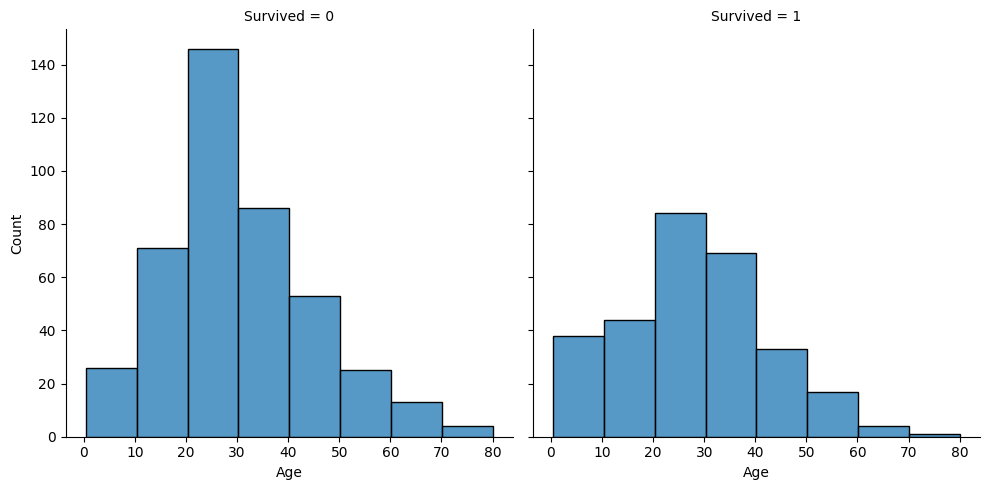

In [ ]:
# Check survivability per age and visualize it
sns.displot(train, x='Age', col='Survived', binwidth=10, height=5);

In [ ]:
# Create a binning of the age column
train['Age_Cut'] = pd.qcut(train['Age'], 8)
test['Age_Cut'] = pd.qcut(test['Age'], 8)

In [ ]:
# Check the distribution per age
train.groupby(['Age_Cut'], as_index=False)['Survived'].mean()

/tmp/ipython-input-17-940219345.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train.groupby(['Age_Cut'], as_index=False)['Survived'].mean()


,Age_Cut,Survived
0,"(0.419, 16.0]",0.550000
1,"(16.0, 20.125]",0.341772
2,"(20.125, 24.0]",0.367347
3,"(24.0, 28.0]",0.352941
4,"(28.0, 32.312]",0.416667
5,"(32.312, 38.0]",0.450549
6,"(38.0, 47.0]",0.329545
7,"(47.0, 80.0]",0.415730


## **Data Preparation**

In [ ]:
# Determine position of data
"""
loc stands for label-based indexing.
It's used to access rows and columns by their labels, not by position.
"""

# Assign Bins per category in Train
train.loc[train['Age'] <= 16, 'Age'] = 0
train.loc[(train['Age'] > 16) & (train['Age'] <= 20.125), 'Age'] = 1
train.loc[(train['Age'] > 20.125) & (train['Age'] <= 24), 'Age'] = 2
train.loc[(train['Age'] > 24) & (train['Age'] <= 28), 'Age'] = 3
train.loc[(train['Age'] > 28) & (train['Age'] <= 32.212), 'Age'] = 4
train.loc[(train['Age'] > 32.212) & (train['Age'] <= 38), 'Age'] = 5
train.loc[(train['Age'] > 38) & (train['Age'] <= 47), 'Age'] = 6
train.loc[(train['Age'] > 47) & (train['Age'] <= 80), 'Age'] = 7
train.loc[train['Age'] > 80, 'Age']


# Assign Bins per category in Test
test.loc[test['Age'] <= 16, 'Age'] = 0
test.loc[(test['Age'] > 16) & (test['Age'] <= 20.125), 'Age'] = 1
test.loc[(test['Age'] > 20.125) & (test['Age'] <= 24), 'Age'] = 2
test.loc[(test['Age'] > 24) & (test['Age'] <= 28), 'Age'] = 3
test.loc[(test['Age'] > 28) & (test['Age'] <= 32.212), 'Age'] = 4
test.loc[(test['Age'] > 32.212) & (test['Age'] <= 38), 'Age'] = 5
test.loc[(test['Age'] > 38) & (test['Age'] <= 47), 'Age'] = 6
test.loc[(test['Age'] > 47) & (test['Age'] <= 80), 'Age'] = 7
test.loc[test['Age'] > 80, 'Age']

,Age


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,"(20.125, 24.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,71.2833,C85,C,2,Small,"(32.312, 38.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,"(24.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,53.1000,C123,S,2,Small,"(32.312, 38.0]"
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,8.0500,NaN,S,1,Alone,"(32.312, 38.0]"


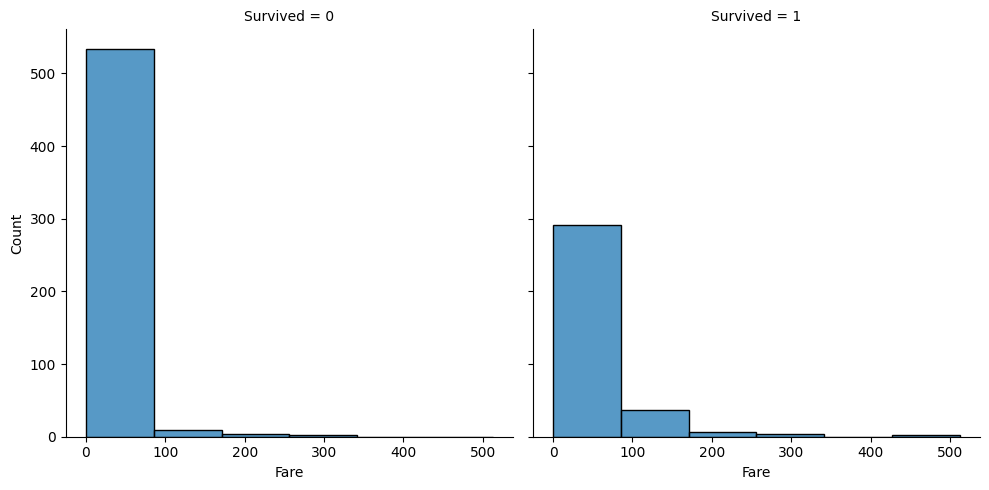

In [ ]:
# Check Fare matrix
sns.displot(train, x='Fare', col='Survived', binwidth=80, height=5);

In [ ]:
# Create a bin for the Fare
train['Fare_Cut'] = pd.qcut(train['Fare'], 6)
test['Fare_Cut'] = pd.qcut(test['Fare'], 6)

In [ ]:
# People who paid higher has higher chance of survival
train.groupby(['Fare_Cut'], as_index=False)['Survived'].mean()

/tmp/ipython-input-22-3558620135.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train.groupby(['Fare_Cut'], as_index=False)['Survived'].mean()


,Fare_Cut,Survived
0,"(-0.001, 7.775]",0.205128
1,"(7.775, 8.662]",0.190789
2,"(8.662, 14.454]",0.366906
3,"(14.454, 26.0]",0.436242
4,"(26.0, 52.369]",0.417808
5,"(52.369, 512.329]",0.697987


In [ ]:
# Assign Bins for Fare (Train)
train.loc[train['Fare'] <= 7.775, 'Fare'] = 0
train.loc[(train['Fare'] > 7.775) & (train['Fare'] <= 8.662), 'Fare'] = 1
train.loc[(train['Fare'] > 8.662) & (train['Fare'] <= 14.454), 'Fare'] = 2
train.loc[(train['Fare'] > 14.454) & (train['Fare'] <= 26), 'Fare'] = 3
train.loc[(train['Fare'] > 26) & (train['Fare'] <= 52.369), 'Fare'] = 4
train.loc[(train['Fare'] > 52.369) & (train['Fare'] <= 512.329), 'Fare'] = 5
train.loc[train['Fare'] > 512.329, 'Fare']

# Assign Bins for Fare (Test)
test.loc[test['Fare'] <= 7.775, 'Fare'] = 0
test.loc[(test['Fare'] > 7.775) & (test['Fare'] <= 8.662), 'Fare'] = 1
test.loc[(test['Fare'] > 8.662) & (test['Fare'] <= 14.454), 'Fare'] = 2
test.loc[(test['Fare'] > 14.454) & (test['Fare'] <= 26), 'Fare'] = 3
test.loc[(test['Fare'] > 26) & (test['Fare'] <= 52.369), 'Fare'] = 4
test.loc[(test['Fare'] > 52.369) & (test['Fare'] <= 512.329), 'Fare'] = 5
test.loc[test['Fare'] > 512.329, 'Fare']

,Fare
343,512.3292


### **Feature Engineering**

#### **Feature 1: Title**

In [ ]:
# Feature 1: Does a person's title relate to survival rates?
train['Name']

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [ ]:
# Parsing data to extract the title from the names

"""
1. train['Name'].str.split(pat=",", expand=True)[1]
Splits the name by the comma.

"Braund, Mr. Owen Harris" becomes ["Braund", " Mr. Owen Harris"]

[1] gets " Mr. Owen Harris"

2. .str.split(pat=".", expand=True)[0]
Splits " Mr. Owen Harris" by the period (.)
" Mr. Owen Harris" becomes [" Mr", " Owen Harris"]
[0] gets " Mr"

3. .apply(lambda x: x.strip())
Removes any leading or trailing whitespace. " Mr" → "Mr"
"""

train['Title'] = train['Name'].str.split(pat= ",", expand=True)[1].str.split(pat= ".", expand=True)[0].apply(lambda x: x.strip())
test['Title'] = test['Name'].str.split(pat= ",", expand=True)[1].str.split(pat= ".", expand=True)[0].apply(lambda x: x.strip())

In [ ]:
# Check survivability per title
train.groupby(['Title'], as_index=False)['Survived'].mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


In [ ]:
# Classify per title

#military - Capt, Col, Major
#noble - Jonkheer, the Countess, Don, Lady, Sir
#unmaried Female - Mlle, Ms, Mme


train['Title'] = train['Title'].replace({
    'Capt': 'Military',
    'Col': 'Military',
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Mlle': 'Noble',
    'Ms': 'Noble',
    'Mme': 'Noble'
})

test['Title'] = test['Title'].replace({
    'Capt': 'Military',
    'Col': 'Military',
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Mlle': 'Noble',
    'Ms': 'Noble',
    'Mme': 'Noble'
})

In [ ]:
# Check average survivability per Title
# You cannot use categorical data in ML. Transform it into numerical by creating a mapping

train.groupby(['Title'], as_index=False)['Survived'].agg(['count', 'mean'])

,Title,count,mean
0,Dr,7,0.428571
1,Master,40,0.575000
2,Military,5,0.400000
3,Miss,182,0.697802
4,Mr,517,0.156673
5,Mrs,125,0.792000
6,Noble,9,0.777778
7,Rev,6,0.000000


#### **Feature 2: Name Length**

In [ ]:
# Feature 2: Does people with longer name survived better?
# Calculate the number of characters in each passenger’s name.
train['Name_Length'] = train['Name'].apply(lambda x: len(x))
test['Name_Length'] = test['Name'].apply(lambda x: len(x))

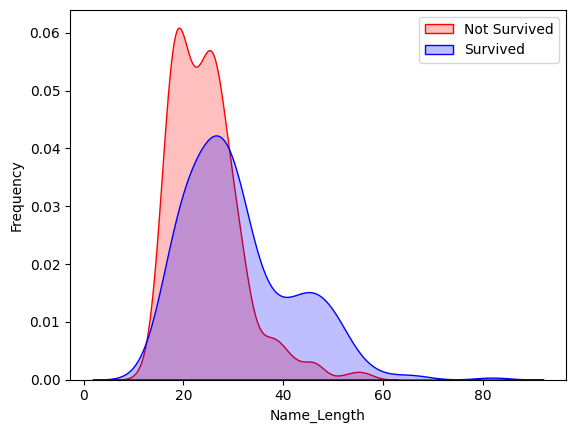

In [ ]:
"""
You're plotting Kernel Density Estimation (KDE) curves using Seaborn to visualize
how the length of passenger names (Name_Length) is distributed — and
how it differs between those who survived and those who did not.

Shape and location of the KDE curves can tell you:
 > Do survivors tend to have longer or shorter names than non-survivors?
 > Is there a noticeable shift in the distribution?

"""

# Plot a KDE Curve
g = sns.kdeplot(train['Name_Length'][(train['Survived']==0) & (train['Name_Length'].notnull())], color='Red', fill=True)
g = sns.kdeplot(train['Name_Length'][(train['Survived']==1) & (train['Name_Length'].notnull())], ax=g, color='Blue', fill=True)
g.set_xlabel('Name_Length')
g.set_ylabel('Frequency')
g = g.legend(['Not Survived', 'Survived'])

In [ ]:
# Bin the Name Length Variable
train['Name_LengthGB'] = pd.qcut(train['Name_Length'], 8)
test['Name_LengthGB'] = pd.qcut(test['Name_Length'], 8)

In [ ]:
train.groupby(['Name_LengthGB'], as_index=False)['Survived'].mean()

/tmp/ipython-input-32-2599607309.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train.groupby(['Name_LengthGB'], as_index=False)['Survived'].mean()


,Name_LengthGB,Survived
0,"(11.999, 18.0]",0.214286
1,"(18.0, 20.0]",0.252427
2,"(20.0, 23.0]",0.307692
3,"(23.0, 25.0]",0.346939
4,"(25.0, 27.25]",0.292929
5,"(27.25, 30.0]",0.428571
6,"(30.0, 38.0]",0.517241
7,"(38.0, 82.0]",0.745283


In [ ]:
"""
This code is binning the Name_Length values into a new categorical column called Name_Size,
assigning a discrete size category (0 to 7) based on how long a passenger's name is.

"""

# Assign Bins for the Name Length Category (Train)
train.loc[train['Name_Length'] <= 18, 'Name_Size'] = 0
train.loc[(train['Name_Length'] > 18) & (train['Name_Length'] <= 20), 'Name_Size'] = 1
train.loc[(train['Name_Length'] > 20) & (train['Name_Length'] <= 23), 'Name_Size'] = 2
train.loc[(train['Name_Length'] > 23) & (train['Name_Length'] <= 25), 'Name_Size'] = 3
train.loc[(train['Name_Length'] > 25) & (train['Name_Length'] <=  27.25), 'Name_Size'] = 4
train.loc[(train['Name_Length'] >  27.25) & (train['Name_Length'] <= 30), 'Name_Size'] = 5
train.loc[(train['Name_Length'] > 30) & (train['Name_Length'] <= 38), 'Name_Size'] = 6
train.loc[(train['Name_Length'] > 38) & (train['Name_Length'] <= 82), 'Name_Size'] = 7
train.loc[train['Name_Length'] > 82, 'Name_Size']

# Assign Bins for the Name Length Category (Test)
test.loc[test['Name_Length'] <= 18, 'Name_Size'] = 0
test.loc[(test['Name_Length'] > 18) & (test['Name_Length'] <= 20), 'Name_Size'] = 1
test.loc[(test['Name_Length'] > 20) & (test['Name_Length'] <= 23), 'Name_Size'] = 2
test.loc[(test['Name_Length'] > 23) & (test['Name_Length'] <= 25), 'Name_Size'] = 3
test.loc[(test['Name_Length'] > 25) & (test['Name_Length'] <=  27.25), 'Name_Size'] = 4
test.loc[(test['Name_Length'] >  27.25) & (test['Name_Length'] <= 30), 'Name_Size'] = 5
test.loc[(test['Name_Length'] > 30) & (test['Name_Length'] <= 38), 'Name_Size'] = 6
test.loc[(test['Name_Length'] > 38) & (test['Name_Length'] <= 82), 'Name_Size'] = 7
test.loc[test['Name_Length'] > 82, 'Name_Size']

,Name_Size


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut,Fare_Cut,Title,Name_Length,Name_LengthGB,Name_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,NaN,S,2,Small,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,C85,C,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51,"(38.0, 82.0]",7.0
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,NaN,S,1,Alone,"(24.0, 28.0]","(7.775, 8.662]",Miss,22,"(20.0, 23.0]",2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,C123,S,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,44,"(38.0, 82.0]",7.0
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,NaN,S,1,Alone,"(32.312, 38.0]","(7.775, 8.662]",Mr,24,"(23.0, 25.0]",3.0


#### **Feature 3: Ticket Type**

In [ ]:
# Feature 3: Do people who purchased more expensive ticket survived better?
train['Ticket']

,Ticket
0,A/5 21171
1,PC 17599
2,STON/O2. 3101282
3,113803
4,373450
...,...
886,211536
887,112053
888,W./C. 6607
889,111369


In [ ]:
"""
You're trying to extract the last part of each ticket string — often the ticket
number — and save it into a new column called TicketNumber.
"""

train['TicketNumber'] = train['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))
test['TicketNumber'] = test['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))

In [ ]:
train.groupby(['TicketNumber'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending=False)

,TicketNumber,count,mean
94,1601,7,0.714286
196,2343,7,0.000000
464,347082,7,0.000000
468,347088,6,0.000000
358,3101295,6,0.000000
...,...,...,...
276,2667,1,1.000000
278,2669,1,0.000000
279,26707,1,0.000000
280,2671,1,0.000000


In [ ]:
"""
Many passengers shared tickets (often families or groups).
Knowing how many people share a ticket can hint at group survival behavior,
family size, or class.
"""

train.groupby('TicketNumber')['TicketNumber'].transform('count')

,TicketNumber
0,1
1,1
2,1
3,2
4,1
...,...
886,1
887,1
888,2
889,1


In [ ]:
"""
For each passenger, it calculates how many other passengers share the same
TicketNumber — and assigns that count to a new column called TicketNumberCounts.
"""

train['TicketNumberCounts'] = train.groupby('TicketNumber')['TicketNumber'].transform('count')
test['TicketNumberCounts'] = test.groupby('TicketNumber')['TicketNumber'].transform('count')

In [ ]:
"""
How many passengers fall into each TicketNumberCounts group.

The average survival rate (mean) for that group.

And then sorts the result by number of passengers per group size.

"""

train.groupby(['TicketNumberCounts'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending=False)

,TicketNumberCounts,count,mean
0,1,544,0.295956
1,2,188,0.569149
2,3,66,0.712121
3,4,44,0.500000
6,7,21,0.238095
5,6,18,0.000000
4,5,10,0.000000


In [ ]:
# Check again what can we infer from the Ticket column
train['Ticket']

,Ticket
0,A/5 21171
1,PC 17599
2,STON/O2. 3101282
3,113803
4,373450
...,...
886,211536
887,112053
888,W./C. 6607
889,111369


In [ ]:
# Parse the Ticket Column
train['Ticket'].str.split(pat=" ", expand=True)

,0,1,2
0,A/5,21171,None
1,PC,17599,None
2,STON/O2.,3101282,None
3,113803,None,None
4,373450,None,None
...,...,...,...
886,211536,None,None
887,112053,None,None
888,W./C.,6607,None
889,111369,None,None


In [ ]:
"""
This code is extracting the prefix or location part of a passenger's ticket and
assigning it to a new column called TicketLocation — or marking it as 'Blank'
if no prefix exists.
"""

train['TicketLocation'] = np.where(train['Ticket'].str.split(pat=" ", expand=True)[1].notna(), train['Ticket'].str.split(pat=" ", expand=True)[0].apply(lambda x: x.strip()), 'Blank')
test['TicketLocation'] = np.where(test['Ticket'].str.split(pat=" ", expand=True)[1].notna(), test['Ticket'].str.split(pat=" ", expand=True)[0].apply(lambda x: x.strip()), 'Blank')

In [ ]:
train['TicketLocation'].value_counts()

,count
TicketLocation,
Blank,665
PC,60
C.A.,27
STON/O,12
A/5,10
W./C.,9
CA.,8
SOTON/O.Q.,8
A/5.,7


In [ ]:
# Data Cleansing and removing . in the name
train['TicketLocation'] = train['TicketLocation'].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'C.A.':'CA',
    'CA.':'CA',
    'SC/PARIS':'SC/Paris',
    'S.C./PARIS':'SC/Paris',
    'A/4.':'A/4',
    'A/5.':'A/5',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'W./C.':'W/C',
})

test['TicketLocation'] = test['TicketLocation'].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'C.A.':'CA',
    'CA.':'CA',
    'SC/PARIS':'SC/Paris',
    'S.C./PARIS':'SC/Paris',
    'A/4.':'A/4',
    'A/5.':'A/5',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'W./C.':'W/C',
})

In [ ]:
train.groupby(['TicketLocation'], as_index=False)['Survived'].agg(['count', 'mean'])

,TicketLocation,count,mean
0,A/4,6,0.000000
1,A/5,21,0.095238
2,A/S,1,0.000000
3,A4.,1,0.000000
4,Blank,665,0.383459
5,C,5,0.400000
6,C.A./SOTON,1,0.000000
7,CA,41,0.341463
8,F.C.,1,0.000000
9,F.C.C.,5,0.800000


#### **Feature 4: Cabin Type**

In [ ]:
# Replaces all missing values (NaN) in the Cabin column with 'U' (short for Unknown).
train['Cabin'] = train['Cabin'].fillna('U')
train['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in train['Cabin']])

test['Cabin'] = test['Cabin'].fillna('U')
test['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in test['Cabin']])

In [ ]:
train.groupby(['Cabin'], as_index=False)['Survived'].agg(['count', 'mean'])

,Cabin,count,mean
0,A,15,0.466667
1,B,47,0.744681
2,C,59,0.593220
3,D,33,0.757576
4,E,32,0.750000
5,F,13,0.615385
6,G,4,0.500000
7,T,1,0.000000
8,U,687,0.299854


In [ ]:
"""
You're creating a new binary feature called Cabin_Assigned to
indicate whether a passenger had a cabin assigned or not.

Many passengers had no recorded cabin, especially in lower classes.
"""

train['Cabin_Assigned'] = train['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)
test['Cabin_Assigned'] = test['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)

In [ ]:
train.groupby(['Cabin_Assigned'], as_index=False)['Survived'].agg(['count', 'mean'])

,Cabin_Assigned,count,mean
0,0,687,0.299854
1,1,204,0.666667


## **Modeling**

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_Cut,Fare_Cut,Title,Name_Length,Name_LengthGB,Name_Size,TicketNumber,TicketNumberCounts,TicketLocation,Cabin_Assigned
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,...,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",2.0,21171,1,A/5,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,...,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51,"(38.0, 82.0]",7.0,17599,1,PC,1
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,...,"(24.0, 28.0]","(7.775, 8.662]",Miss,22,"(20.0, 23.0]",2.0,3101282,1,STON/O2.,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,...,"(32.312, 38.0]","(52.369, 512.329]",Mrs,44,"(38.0, 82.0]",7.0,113803,2,Blank,1
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,...,"(32.312, 38.0]","(7.775, 8.662]",Mr,24,"(23.0, 25.0]",3.0,373450,1,Blank,0


In [ ]:
train.shape

(891, 24)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   PassengerId          891 non-null    int64   
 1   Survived             891 non-null    int64   
 2   Pclass               891 non-null    int64   
 3   Name                 891 non-null    object  
 4   Sex                  891 non-null    object  
 5   Age                  714 non-null    float64 
 6   SibSp                891 non-null    int64   
 7   Parch                891 non-null    int64   
 8   Ticket               891 non-null    object  
 9   Fare                 891 non-null    float64 
 10  Cabin                891 non-null    object  
 11  Embarked             889 non-null    object  
 12  Family_Size          891 non-null    int64   
 13  Family_Size_Grouped  891 non-null    object  
 14  Age_Cut              714 non-null    category
 15  Fare_Cut             89

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   PassengerId          418 non-null    int64   
 1   Pclass               418 non-null    int64   
 2   Name                 418 non-null    object  
 3   Sex                  418 non-null    object  
 4   Age                  332 non-null    float64 
 5   SibSp                418 non-null    int64   
 6   Parch                418 non-null    int64   
 7   Ticket               418 non-null    object  
 8   Fare                 417 non-null    float64 
 9   Cabin                418 non-null    object  
 10  Embarked             418 non-null    object  
 11  Family_Size          418 non-null    int64   
 12  Family_Size_Grouped  418 non-null    object  
 13  Age_Cut              332 non-null    category
 14  Fare_Cut             417 non-null    category
 15  Title                41

#### **Data Pre-processing**

In [ ]:
# Variable Imputation
train['Age'].fillna(train['Age'].mean(), inplace=True)
test['Age'].fillna(test['Age'].mean(), inplace=True)
test['Fare'].fillna(test['Fare'].mean(), inplace=True)


/tmp/ipython-input-55-4008751271.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].mean(), inplace=True)
/tmp/ipython-input-55-4008751271.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline


"""
OrdinalEncoder: Converts categorical variables to ordered numbers (e.g., 'Low' → 0, 'Medium' → 1).
OneHotEncoder: Converts categories into one-hot vectors (e.g., 'Red' → [1, 0, 0], 'Blue' → [0, 1, 0])
SimpleImputer: Fills in missing values using a specified strategy (e.g., mean, median, or most frequent).

"""


ohe = OneHotEncoder(sparse_output=False)
ode = OrdinalEncoder
SI = SimpleImputer(strategy='most_frequent')

In [ ]:
ode_cols = ['Family_Size_Grouped']
ohe_cols = ['Sex', 'Embarked']

<Axes: >

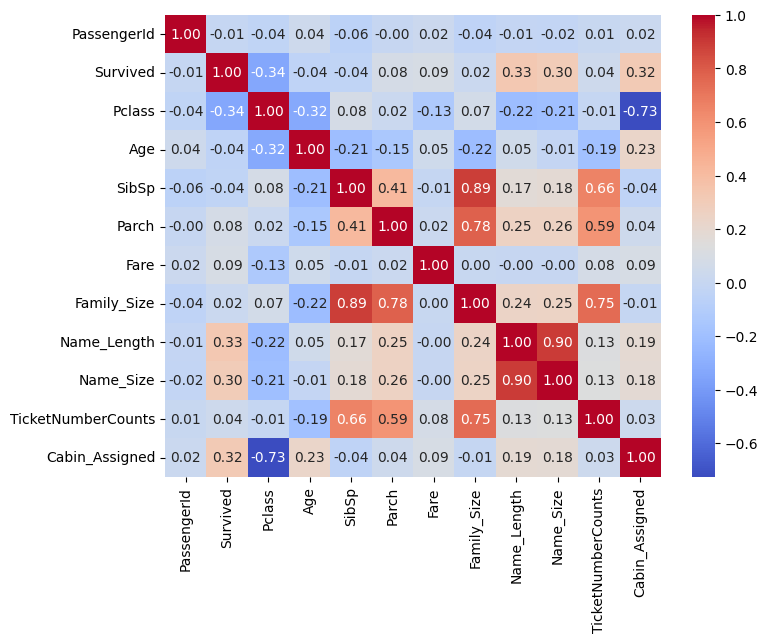

In [ ]:
correlation_matrix = train.corr(numeric_only=True)

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

#### **Data Partitioning**

In [ ]:
"""
You're setting up:
X: inputs for training
y: outputs for training
X_test: inputs for prediction


You're separating your questions (X) from your answers (y)
so the model can learn to answer new questions (X_test) on its own.

"""

# X = the information about each passenger (like age, fare, cabin, etc.)
# You're dropping: 'Survived' – this is your target, so it's removed from X.
X = train.drop(['Survived', 'SibSp', 'Parch'], axis=1)

# y is your target variable (what you want to predict).
y = train['Survived']


"""
'Age_Cut' and 'Fare_Cut': likely derived features from Age and Fare
that you may not want to include.
"""

# X_test = similar passenger data from the test set (without survival info)
# Used for making predictions after training
# You're preparing the test features (X_test)
X_test = test.drop(['Age_Cut', 'Fare_Cut'], axis=1)

In [ ]:
"""
So we split the data:

Training set (X_train, y_train): Used to teach the model.

Validation set (X_valid, y_valid): Used to check how well the model performs on unseen data.
"""


from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify = y, random_state=21)

#### **Data Pipelines**

A pipeline is a way to **organize and automate** the steps in a machine learning workflow — from data preprocessing to model training — all in one object.


**Why Use a Pipeline?**
+ Keeps code clean and organized
+ Prevents data leakage (applying transformations to training and test data separately)

+ Makes it easier to:
  + Cross-validate
  + Tune hyperparameters
  + Deploy models

In [ ]:
"""
This pipeline fills missing ordinal values and encodes them into
ordered numbers — while handling unseen values safely.

Fills in missing values with the most frequent (common) category in each column.
Example: if a column has values ['Low', 'Low', 'Medium', NaN] → NaN becomes 'Low'


Converts categorical values to integer codes that represent order.
For example: ['Low', 'Medium', 'High'] → [0, 1, 2]

Inside OrdinalEncoder:
handle_unknown='use_encoded_value': prevents errors if new (unseen) values appear later.
unknown_value=-1: unseen categories during inference will be encoded as -1.

"""

ordinal_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [ ]:
"""
You're building a pipeline for one-hot encoding categorical variables,
especially for features where the categories have no inherent order
(also called nominal variables).


Simple Imputer: Fills in missing values in the categorical column using the most frequent value
(e.g., if 'male' appears most often, missing values become 'male').

One Hot Encoder: Converts each category into a separate binary column.
For example, 'Embarked' with values 'C', 'Q', 'S' becomes:
(C = 1,0,0; Q = 0,1,0; S = 0,0,1)

handle_unknown='ignore': if a new category appears during testing (not seen in training),
it won't crash — it will assign zeros.
"""


ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(handle_unknown = 'ignore', sparse_output=False))
])

#### **Transformers**

In [ ]:
"""
You're creating a ColumnTransformer in Scikit-learn — a
powerful tool that lets you apply different preprocessing steps
to different columns in one go.

You clean and encode everything as needed,
while letting some features pass through directly — all in one object.

Remainder: Any columns not listed in this transformer will be excluded from the final dataset.
n_jobs=-1: Uses all CPU cores for parallel processing (faster).
"""

# Setup the transformer
col_trans = ColumnTransformer(transformers=[
    ('impute', SI, ['Age']),
    ('ord_pipeline', ordinal_pipeline, ode_cols),
    ('ohe_pipeline', ohe_pipeline, ohe_cols),
    ('passthrough', 'passthrough', ['Pclass', 'TicketNumberCounts', 'Cabin_Assigned', 'Name_Size', 'Age', 'Fare'])
    ],
    remainder='drop',
    n_jobs=-1)

#### **Create the Model**

In [ ]:
"""
It's an ensemble of decision trees.
Each tree is trained on a random sample of the data.
Final prediction is made by voting (classification) or averaging (regression).

"""

from sklearn.ensemble import RandomForestClassifier, VotingClassifier

rfc = RandomForestClassifier()

In [ ]:
param_grid = {
    'min_samples_split': [5, 10, 15],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [ ]:
pipefinalrfc = make_pipeline(col_trans, CV_rfc)
pipefinalrfc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'Cabin_Assigned',
                                                   'Name_Size', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 20, 30],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [5, 10, 15]}))])

In [ ]:
print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.8300305328474344


In [ ]:
Y_pred = pipefinalrfc.predict(X_test)

In [ ]:
prediction = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': Y_pred
})

In [ ]:
# Check Predictions
prediction.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


#### **Visualizations**

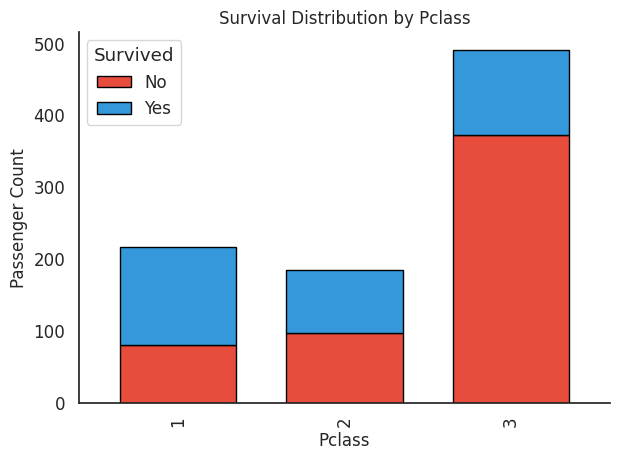

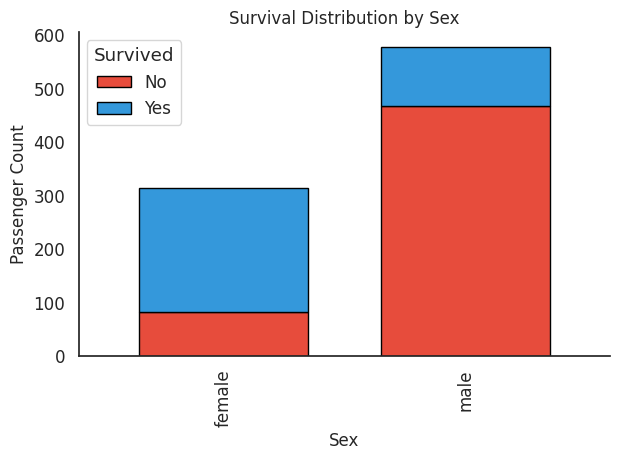

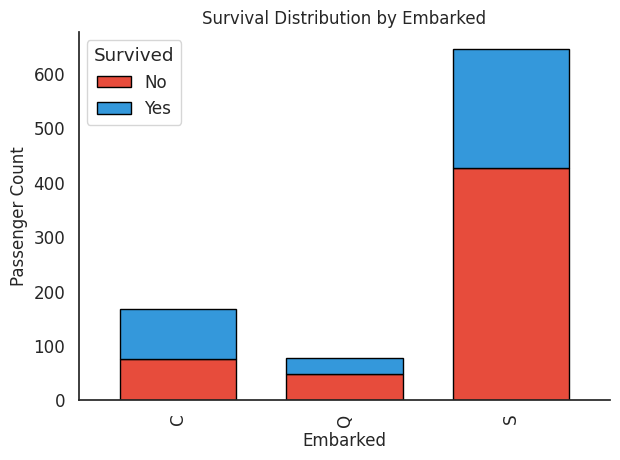

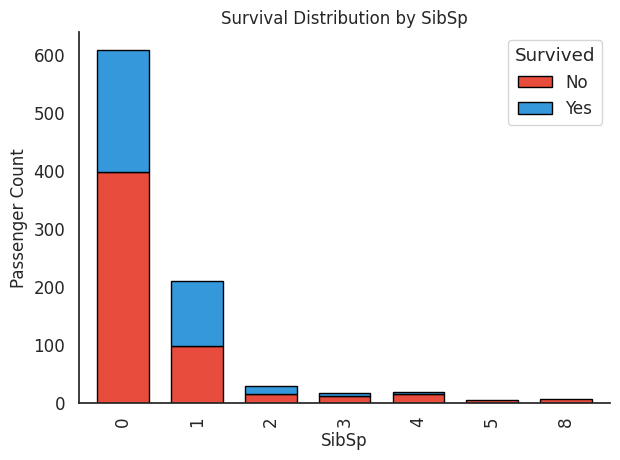

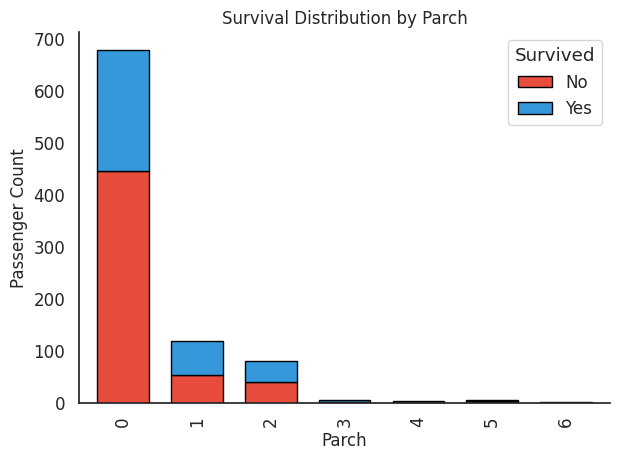

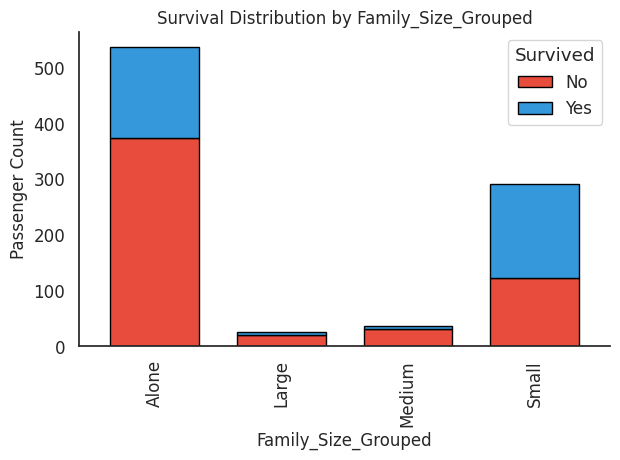

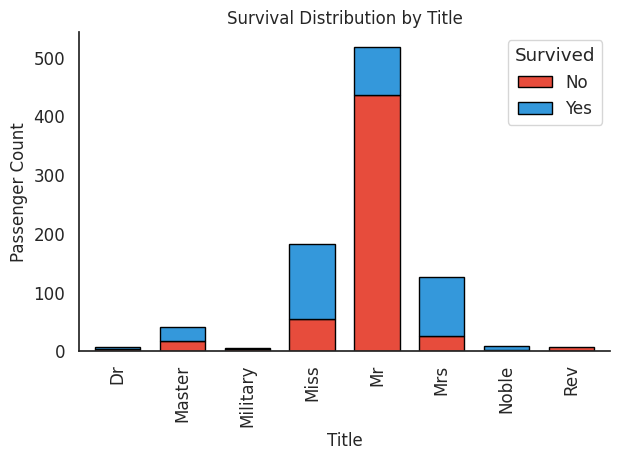

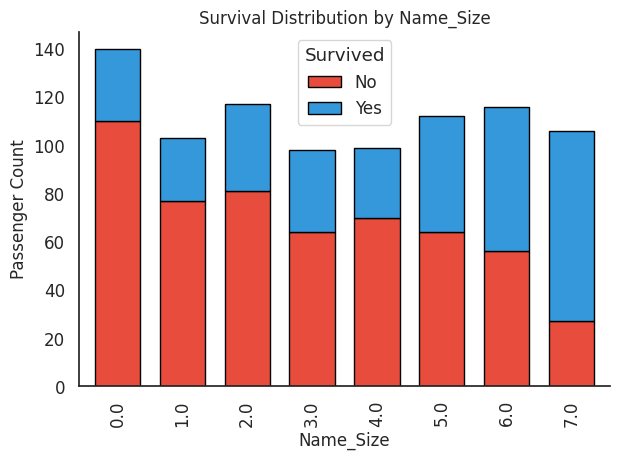

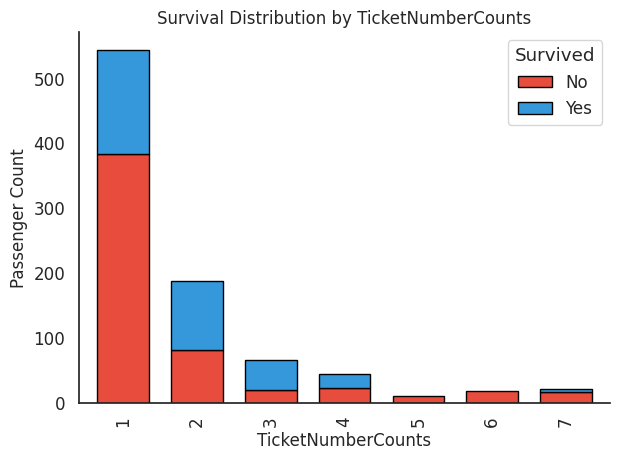

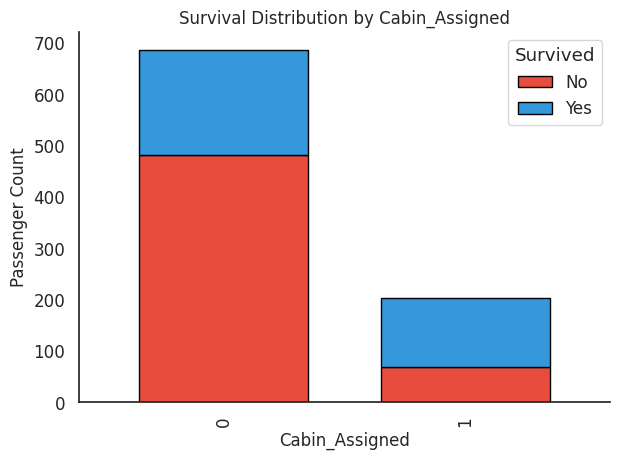

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set style and font
sns.set(style="white", font_scale=1.1)

bar_palette = ['#e74c3c', '#3498db']  # red, blue

# List of categorical/ordinal features
features_to_visualize = [
    'Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch', 'Family_Size_Grouped',
    'Title', 'Name_Size', 'TicketNumberCounts', 'Cabin_Assigned'
]

# Stacked bar charts: count of survived/not survived per feature
for feature in features_to_visualize:
    if feature in train.columns:
        # Create a cross-tabulation of counts
        counts = pd.crosstab(train[feature], train['Survived'])

        # Ensure columns are in [0, 1] order if both exist
        if 1 in counts.columns:
            counts = counts[[0, 1]]
        else:
            counts = counts[[0]]

        # Plot stacked bars directly (pandas handles the figure)
        ax = counts.plot(
            kind='bar',
            stacked=True,
            color=bar_palette[:counts.shape[1]],
            width=0.7,
            edgecolor='black'
        )

        # Customize plot
        plt.title(f'Survival Distribution by {feature}', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Passenger Count', fontsize=12)
        plt.legend(title='Survived', labels=['No', 'Yes'][:counts.shape[1]])
        sns.despine()
        plt.tight_layout()
        plt.show()
    else:
        print(f"Feature '{feature}' not found in the training data.")

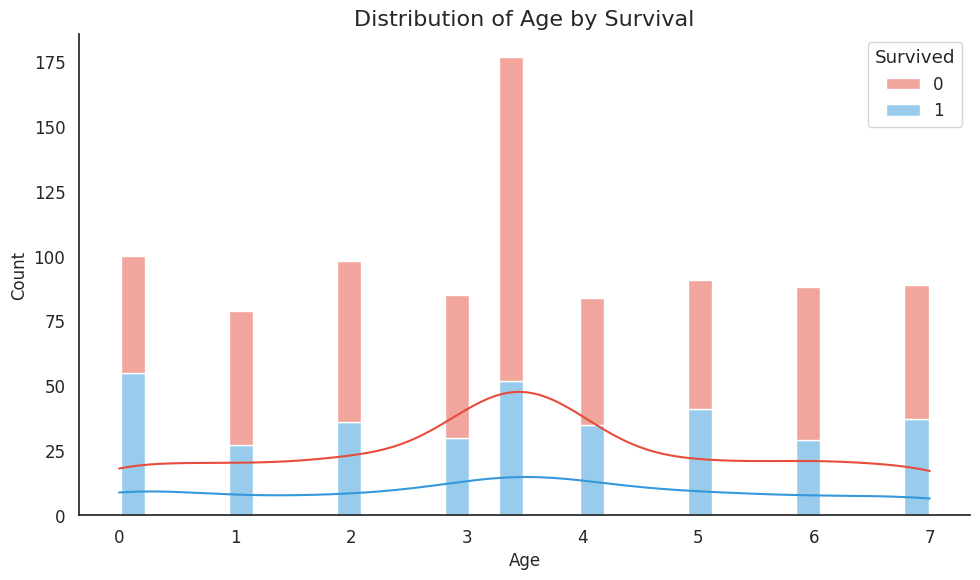

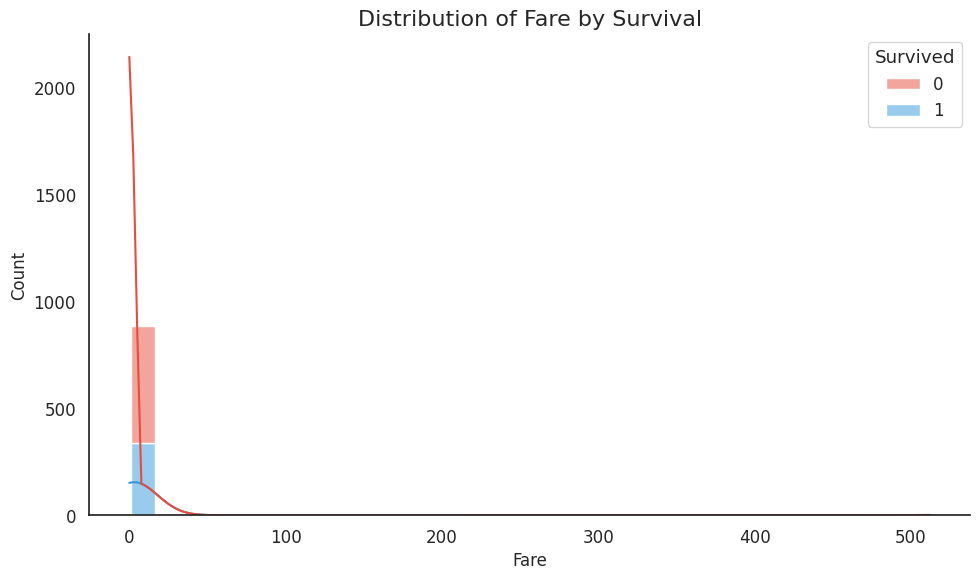

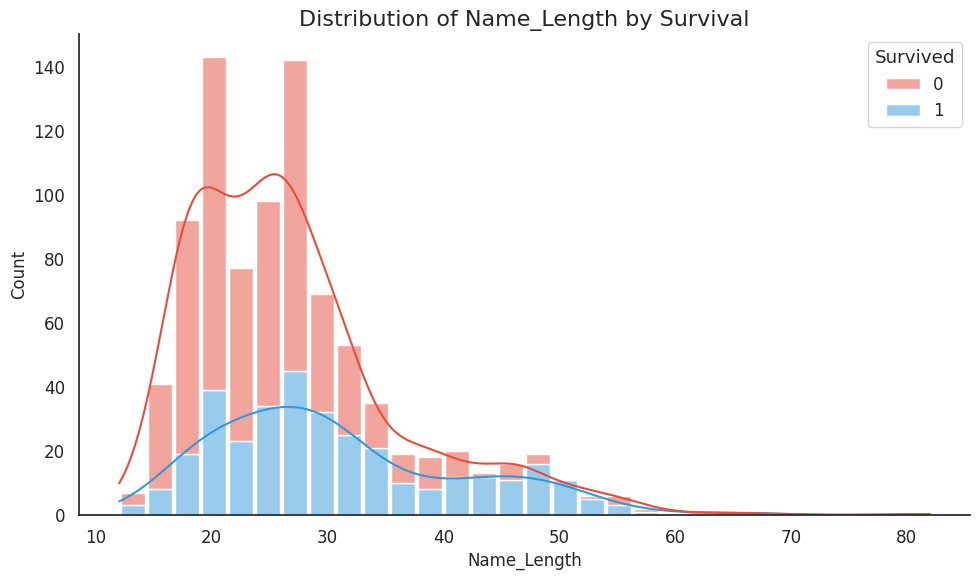

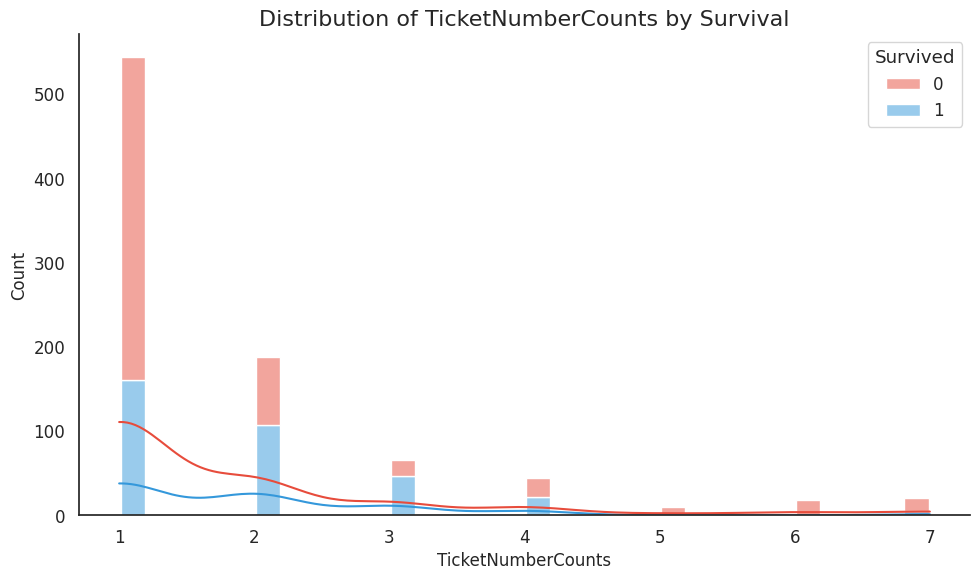

In [ ]:
# Distribution plots for numerical features
# Distribution plots for numerical features
numerical_features = ['Age', 'Fare', 'Name_Length', 'TicketNumberCounts']

for feature in numerical_features:
    if feature in train.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(
            data=train,
            x=feature,
            hue='Survived',
            multiple='stack',
            kde=True,
            bins=30,                # Control number of bars
            shrink=0.9,             # Controls spacing between bars (closer to 1 = wider bars)
            element='bars',         # Ensure full bars are shown
            palette= ['#e74c3c', '#3498db']
        )
        plt.title(f'Distribution of {feature} by Survival', fontsize=16)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        sns.despine()
        plt.tight_layout()
        plt.show()
    else:
        print(f"Numerical feature '{feature}' not found in the training data.")